# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [25]:
print(weather_api_key)

135e28e56ba5261fa4af0305ce2e864d


### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    print(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

taiohae
avarua
wailua homesteads
punta arenas
ceeldheer
jamestown
ust-nera
ushuaia
mhamid
talnakh
ola
puerto natales
albany
port-aux-francais
anadyr
alice springs
storozhevaya
stanley
waitangi
naha
kristiansund
magadan
edna
ushuaia
vorkuta
ushuaia
durango
grytviken
iskateley
waitangi
keflavik
muli
blackmans bay
kodiak
west island
barguzin
tiksi
port-aux-francais
yellowknife
saint-denis
cabo san lucas
karratha
talnakh
karratha
ushuaia
gadzhiyevo
ancud
bredasdorp
baker city
port-aux-francais
schotten
port-aux-francais
dryden
anadyr
bethel
guerrero negro
adamstown
porto novo
fort st. john
jayapura
muzayri'
adamstown
miches
prince rupert
lebu
enewetak
margaret river
isafjordur
hithadhoo
klyuchi
olonkinbyen
hamilton
atafu village
ola
petropavlovsk-kamchatsky
badger
ban houakhoua
west island
qaqortoq
sena madureira
college
el daein
greenville
longyearbyen
buulobarde
bubaque
grytviken
ilulissat
west island
kodiak
olonkinbyen
iskateley
zhezqazghan
saipan
ushuaia
tura
port-aux-francais
arraial 

forio
port-aux-francais
badger
saipan
grytviken
nagqu
port-aux-francais
namibe
ampere
petawawa
port-aux-francais
puerto natales
saipan
waitangi
issia
blackmans bay
adamstown
grytviken
port-aux-francais
inirida
auki
punta arenas
antofagasta
lorengau
crane
invercargill
edinburgh of the seven seas
alofi
lihue
west island
ormara
iquique
avarua
waitangi
port elizabeth
badger
albany
nouadhibou
kavieng
qaqortoq
puerto natales
alaior
bissora
albany
grytviken
waitangi
sidney
avarua
hamilton
ola
west island
port alfred
labrador city
puerto natales
udachny
hamilton
port-aux-francais
hamilton
olonkinbyen
bethel
constantia
korla
kourou
cidade velha
xinyuan
utrik
blackmans bay
bredasdorp
albany
invercargill
tazovsky
kajaani
port-aux-francais
adamstown
nyala
avarua
laguna
nadym
port-aux-francais
walvis bay
chonchi
west island
margaret river
bamiantong
ribeira grande
bilibino
okhotsk
portland
edinburgh of the seven seas
uturoa
ushuaia
necochea
puerto natales
chonchi
uturoa
iqaluit
waitangi
grytviken
u

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + "Metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | ceeldheer
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mhamid
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | ola
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | storozhevaya
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | naha
Processing Record 21 of Set 1 | kristiansund
Processing Record 22 of Set 1 | magada

Processing Record 42 of Set 4 | viqueque
Processing Record 43 of Set 4 | hermanus
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | langzhong
Processing Record 46 of Set 4 | black point
Processing Record 47 of Set 4 | bodo
Processing Record 48 of Set 4 | antalaha
Processing Record 49 of Set 4 | weno
Processing Record 0 of Set 5 | awjilah
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | mhlume
Processing Record 3 of Set 5 | och'amch'ire
Processing Record 4 of Set 5 | labuan
Processing Record 5 of Set 5 | yuzhno-kurilsk
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | vadso
Processing Record 8 of Set 5 | olgii
City not found. Skipping...
Processing Record 9 of Set 5 | tromso
Processing Record 10 of Set 5 | el jadid
Processing Record 11 of Set 5 | fortuna
Processing Record 12 of Set 5 | port mathurin
Processing Record 13 of Set 5 | livingston
Processing Record 14 of Set 5 | santa croce camerina
Processing Record 15 of S

Processing Record 30 of Set 8 | korla
Processing Record 31 of Set 8 | kourou
Processing Record 32 of Set 8 | cidade velha
Processing Record 33 of Set 8 | kajaani
Processing Record 34 of Set 8 | nyala
Processing Record 35 of Set 8 | nadym
Processing Record 36 of Set 8 | walvis bay
Processing Record 37 of Set 8 | chonchi
Processing Record 38 of Set 8 | bamiantong
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | necochea
Processing Record 41 of Set 8 | balykshi
Processing Record 42 of Set 8 | acatic
Processing Record 43 of Set 8 | kandyagash
Processing Record 44 of Set 8 | victorica
Processing Record 45 of Set 8 | las trojes
Processing Record 46 of Set 8 | macusani
Processing Record 47 of Set 8 | motueka
Processing Record 48 of Set 8 | ribeira brava
Processing Record 49 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 0 of Set 9 | mar del plata
Processing Record 1 of Set 9 | oros
Processing Record 2 of Set 9 | rasht
Processing Record 3 of S

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          529
Lat           529
Lng           529
Max Temp      529
Humidity      529
Cloudiness    529
Wind Speed    529
Country       529
Date          529
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,26.03,78,75,9.26,CK,1701203725
1,wailua homesteads,22.0669,-159.3780,21.44,88,100,4.12,US,1701203442
2,punta arenas,-53.1500,-70.9167,11.06,40,40,15.43,CL,1701203728
3,ceeldheer,3.8488,47.1806,26.54,75,47,6.09,SO,1701203729
4,jamestown,42.0970,-79.2353,-2.23,89,100,7.72,US,1701203730


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,26.03,78,75,9.26,CK,1701203725
1,wailua homesteads,22.0669,-159.3780,21.44,88,100,4.12,US,1701203442
2,punta arenas,-53.1500,-70.9167,11.06,40,40,15.43,CL,1701203728
3,ceeldheer,3.8488,47.1806,26.54,75,47,6.09,SO,1701203729
4,jamestown,42.0970,-79.2353,-2.23,89,100,7.72,US,1701203730


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

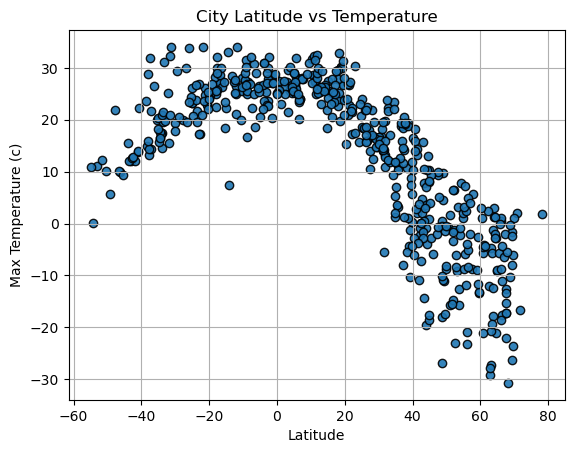

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.9,
    label="Cities"

)

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

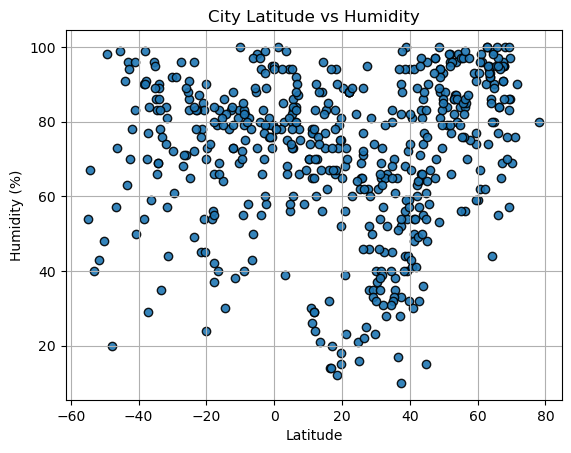

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.9,
    label="Cities"

)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

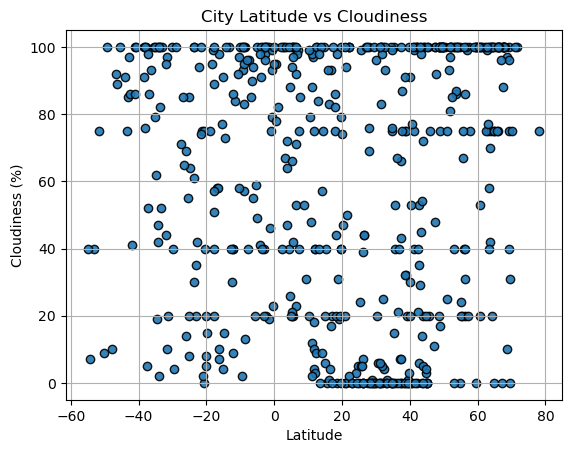

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.9,
    label="Cities"

)


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

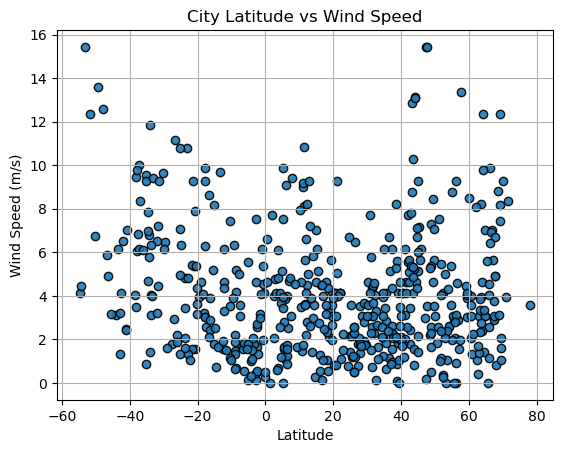

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.9,
    label="Cities"

)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_lin_regression(x_values, y_values, ylabel, text_coords):
    # Computer linear regression
    (slope, intercept, rvalue, pvalue, sterr)= linregress(x_values, y_values)
    y_hat = x_values*slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
#Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, y_hat, "r-")
    plt.annotate(line_eq, text_coords, fontsize=16, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r-value is {rvalue**2}")
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,21.44,88,100,4.12,US,1701203442
3,ceeldheer,3.8488,47.1806,26.54,75,47,6.09,SO,1701203729
4,jamestown,42.0970,-79.2353,-2.23,89,100,7.72,US,1701203730
5,ust-nera,64.5667,143.2000,-20.99,99,100,1.44,RU,1701203732
7,mhamid,29.8200,-5.7200,16.53,23,0,1.74,MA,1701203734


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,26.03,78,75,9.26,CK,1701203725
2,punta arenas,-53.1500,-70.9167,11.06,40,40,15.43,CL,1701203728
6,ushuaia,-54.8000,-68.3000,10.81,54,40,4.12,AR,1701203487
10,puerto natales,-51.7236,-72.4875,12.25,43,75,12.35,CL,1701203738
12,port-aux-francais,-49.3500,70.2167,5.72,98,100,13.59,TF,1701203742


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.751687327965318


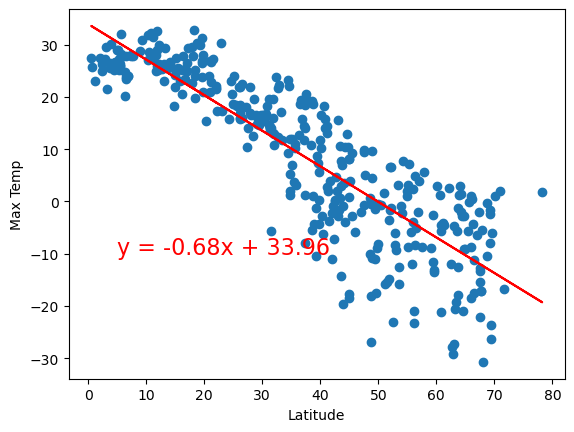

In [39]:
# Linear regression on Northern Hemisphere
plot_lin_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (5, -10))

The r-value is 0.4296074673021976


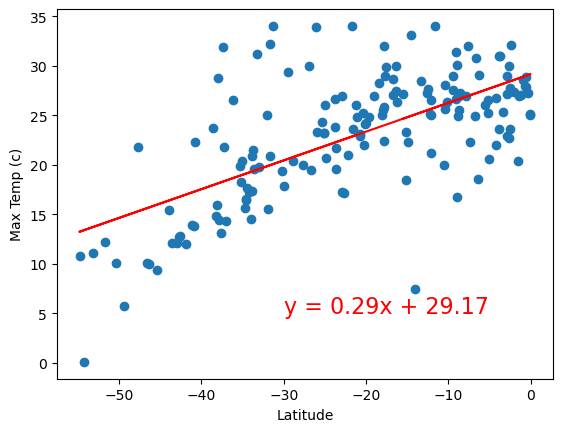

In [40]:
# Linear regression on Southern Hemisphere
plot_lin_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp (c)", (-30, 5))

 **Discussion about the linear relationship:** 

r=0.775 shows a somewhat strong positive linear relationship between the variables. 
r=0.430 shows a moderate positive linear relationship between the variables.

r= 0.775 shows a stronger linear association, while r= 0.430 shows a positive relationship-it's not quite as strong at 0.775.

The relationship between temperature and latitude does shows that as you move closer to the equator (equator= 0 latitude), maximum temperatures tend to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0727380083725068


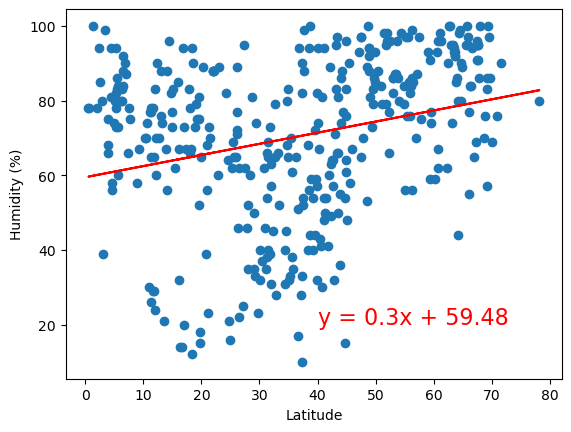

In [41]:
# Northern Hemisphere
plot_lin_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)", (40, 20))

The r-value is 0.012456957423332023


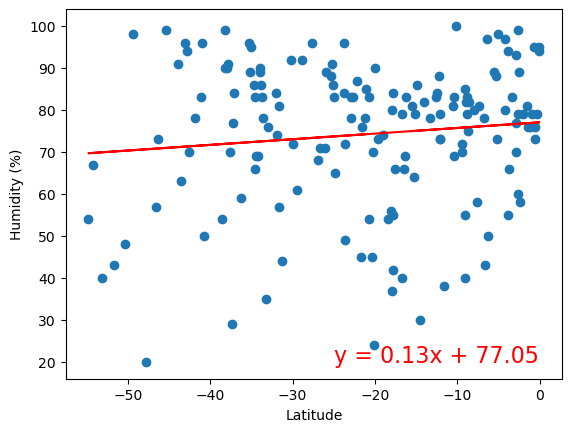

In [42]:
# Southern Hemisphere
plot_lin_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)", (-25, 20))

**Discussion about the linear relationship:** 
r=0.073: This value shows a very weak positive correlation between humidity and latitude, suggesting a slight tendency for both variables to move in the same direction, but the relationship is very weak.


r=0.0125: Similarly, this r value represents an  weak positive linear relationship between humidity and latitude. 

These values show that there's a minimal linear relationship between humidity and latitude.  The graphs are showing a lack of strong correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.03557309951164403


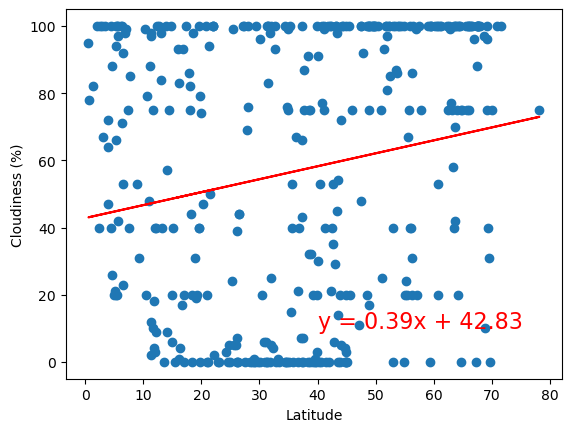

In [43]:
# Northern Hemisphere
plot_lin_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)", (40, 10))

The r-value is 0.0014388671148422916


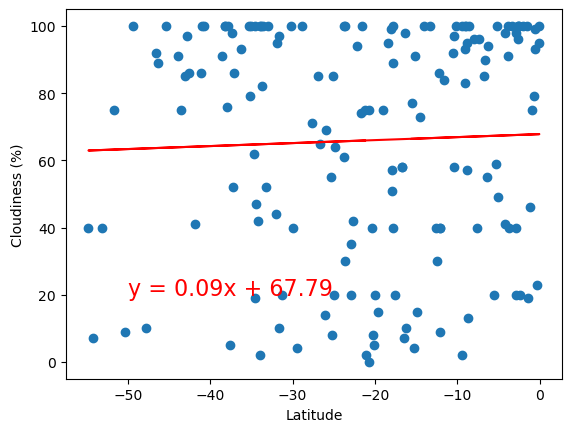

In [44]:
# Southern Hemisphere
plot_lin_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)", (-50,20))

**Discussion about the linear relationship:** 

r=0.036: indicates an extremely weak positive correlation. It implies almost no linear relationship between the variables.
r=0.0014:  is even smaller, suggesting an almost complete absence of any linear association between the variables.

The data suggests that, there's little to no clear pattern indicating how cloudiness changes with different latitudes.

Latitude alone might not be a reliable indicator or predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.008226715156872712


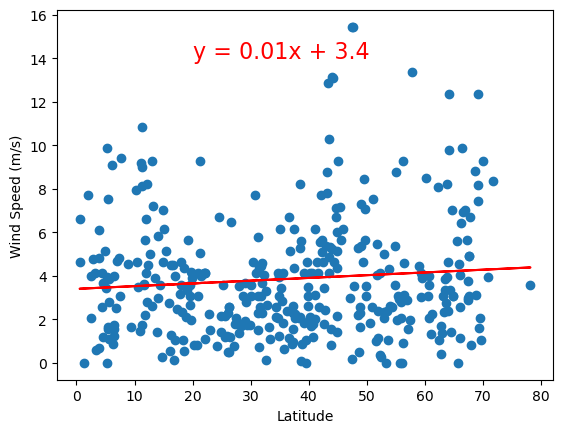

In [47]:
# Northern Hemisphere
plot_lin_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (m/s)", (20,14))

The r-value is 0.2381040981387803


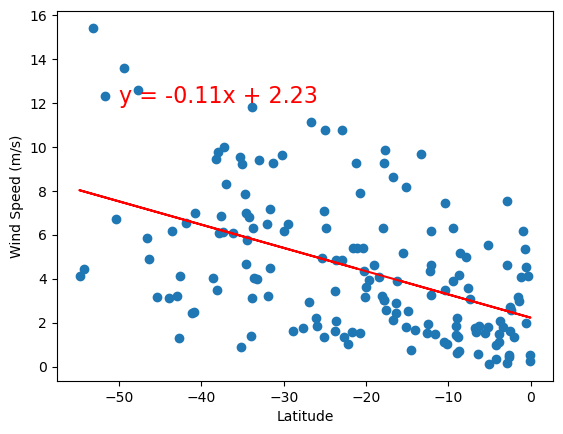

In [48]:
# Southern Hemisphere
plot_lin_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (m/s)", (-50,12))

**Discussion about the linear relationship:** 
r=0.0082: This r-value indicates an extremely weak positive correlation between wind speed and latitude.It suggests a very minimal linear relationship between these variables.

r=0.2381:On the other hand, this r-value signifies a moderate positive linear relationship between wind speed and latitude. It shows a more noticeable positive correlation compared to  r = 0.0082.

r=0.2381 shows a stronger correlation between wind speed and latitude compared to r=0.0082, indicating a more discernible positive linear relationship between these variables in the Wind Speed vs. Latitude.